In [2]:
!sudo apt-get update
!sudo apt-get install ipython3 python3-setuptools python3-pip


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ipython3 is already the newest version (7.31.1-1).
python3-setuptools is already the newest version (59.6.0-1.2ubuntu0.22.04.1).
python3-p

In [3]:
#only needed for colabfold
!pip install pyrosettacolabsetup py3dmol git+https://github.com/RosettaCommons/pyrosetta_viewer3d.git
import pyrosettacolabsetup; pyrosettacolabsetup.install_pyrosetta()

  Cloning https://github.com/RosettaCommons/pyrosetta_viewer3d.git to /tmp/pip-req-build-o6tlv19b
  Running command git clone --filter=blob:none --quiet https://github.com/RosettaCommons/pyrosetta_viewer3d.git /tmp/pip-req-build-o6tlv19b
  Resolved https://github.com/RosettaCommons/pyrosetta_viewer3d.git to commit f467481e8c8cd567fbc2620173e008814b731d72
  Preparing metadata (setup.py) ... done


In [4]:
import pyrosetta; # import the pyrosetta package to access functionality
import pyrosetta.distributed.io as io
pyrosetta.init() # must be called before any other pyrosetta functions. Can accept command line flags

PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2024.01+release.00b79147e63be743438188f93a3f069ca75106d6 2023-12-25T16:35:48] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r366 2024.01+release.00b79147e63 00b79147e63be743438188f93a3f069ca75106d6 http://www.pyrosetta.org 2023-12-25T16:35:48
core.init: command: PyRosetta -ex1 -ex2aro -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=864989763 seed_offset=0 real_seed=864989763
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=864989763 RG_type=mt19937


In [5]:
!python -m pip install fragmenstein


In [6]:
from fragmenstein import Victor, Igor, Monster

In [7]:
import sys
sys.setrecursionlimit(250000)


In [8]:
# Original recursive function
def factorial(n):
    if n < 2:
        return 1
    return n * factorial(n - 1)

# Step 1: Convert recursive calls into tail calls
def factorial1a(n, acc=1):
    if n < 2:
        return 1 * acc
    return factorial1a(n - 1, acc * n)

# Step 2: Introduce a one-shot loop around the function body
def factorial1b(n, acc=1):
    while True:
        if n < 2:
            return 1 * acc
        return factorial1b(n - 1, acc * n)
        break

# Step 3: Convert tail calls into continue statements
def factorial1c(n, acc=1):
    while True:
        if n < 2:
            return 1 * acc
        (n, acc) = (n - 1, acc * n)
        continue
        break

# Step 4: Tidy the code and make it more idiomatic
def factorial1d(n, acc=1):
    while n > 1:
        (n, acc) = (n - 1, acc * n)
    return acc

# Testing the iterative version
print(factorial1d(5))  # Output: 120


120


In [9]:
import csv
import logging
from fragmenstein import Victor
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem.Draw import MolsToGridImage

# Initialize PyRosetta
pyrosetta.init(extra_options='-no_optH false -mute all -ignore_unrecognized_res false -load_PDB_components false')

# Setup logging
logging.basicConfig(filename='victor_log.log', level=logging.INFO)

# Initialize list to store minimized SMILES and molecule data
minimized_smiles_list = []
molecule_data = []

# Initialize list to store 2D structures
mol_2d_structures = []

# Load the protein PDB file
protein_pdb_path = 'chain_A.pdb'

# Process reference molecule
reference_smile = 'CNc1ncc2cc(-c3ccc(-c4ncccc4F)cc3Cl)c(=O)n(C[C@H]3OC[C@H](N)CO3)c2n1'
reference_mol = Chem.AddHs(AllChem.MolFromSmiles(reference_smile))
AllChem.EmbedMolecule(reference_mol, AllChem.ETKDG())

# Define two SMILES strings
smiles1 = 'O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(F)cc3)ncc2c1=O)Nc1ccc(F)cn1'  # Replace with your first SMILES string
smiles2 = 'Cc1cccc(-c2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cn4)c(N4CCOCC4)nc3n2)c1'  # Replace with your second SMILES string
smiles_list = [smiles1, smiles2]

# Process each SMILES string using Victor
for i, smile in enumerate(smiles_list):
    mol = Chem.AddHs(AllChem.MolFromSmiles(smile))
    AllChem.EmbedMolecule(mol, AllChem.ETKDG())
    victor = Victor(hits=[mol], pdb_filename=protein_pdb_path)
    try:
        victor.combine()
    except Chem.AtomValenceException:
        logging.info(f'Atom valence exception occurred for molecule {i+1}, trying to rectify...')
        victor.rectify(collapse_rings=True, joining_cutoff=3.0)
        victor.combine()

    minimized_molecule = victor.minimized_mol
    mol_2d_structures.append(minimized_molecule)
    minimized_smiles = Chem.MolToSmiles(minimized_molecule)
    minimized_smiles_list.append(minimized_smiles)

    # Calculate Lipinski's descriptors
    mw = Descriptors.ExactMolWt(minimized_molecule)
    logp = Descriptors.MolLogP(minimized_molecule)
    hba = Descriptors.NumHAcceptors(minimized_molecule)
    hbd = Descriptors.NumHDonors(minimized_molecule)

    # Save and display molecule data
    output_file = f'minimized_merged_molecule_{i}.mol'
    AllChem.MolToMolFile(minimized_molecule, output_file)
    molecule_data.append([minimized_smiles, mw, logp, hba, hbd, output_file])


PyRosetta-4 2023 [Rosetta PyRosetta4.MinSizeRel.python310.ubuntu 2024.01+release.00b79147e63be743438188f93a3f069ca75106d6 2023-12-25T16:35:48] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: Checking for fconfig files in pwd and ./rosetta/flags
core.init: Rosetta version: PyRosetta4.MinSizeRel.python310.ubuntu r366 2024.01+release.00b79147e63 00b79147e63be743438188f93a3f069ca75106d6 http://www.pyrosetta.org 2023-12-25T16:35:48
core.init: command: PyRosetta -ex1 -ex2aro -no_optH false -mute all -ignore_unrecognized_res false -load_PDB_components false -database /usr/local/lib/python3.10/dist-packages/pyrosetta/database
basic.random.init_random_generator: 'RNG device' seed mode, using '/dev/urandom', seed=1802001090 seed_offset=0 real_seed=1802001090
basic.random.init_random_generator: RandomGenerator:init: Normal mode, seed=1802001090 RG_type=mt19937


DEBUG:Fragmenstein:hit0 - harmonising warheads on hits in "first" mode
DEBUG:Fragmenstein:Merging: ['hit0']
DEBUG:Fragmenstein:Merged
DEBUG:Fragmenstein:Starting ring expansion
DEBUG:Fragmenstein:42 (formerly 125 existed already: fused ring or similar.
DEBUG:Fragmenstein:41 (formerly 112 existed already: fused ring or similar.
DEBUG:Fragmenstein:Restoring original bonding if any.
DEBUG:Fragmenstein:Restoring ring {'atom': <rdkit.Chem.rdchem.Atom object at 0x7dde07aceb20>, 'ori_name': 'hit0', 'elements': ['C', 'C', 'O', 'C', 'C', 'N'], 'neighbors': [[105, 107, 138, 139], [106, 108, 140, 141], [107, 109], [108, 110, 142, 143], [109, 105, 144, 145], [104, 106, 110]], 'ori_is': [106, 107, 108, 109, 110, 105], 'xs': [-2.258903870969933, -3.451662214040896, -3.0634218685445336, -1.927650122894719, -1.6638178664854806, -1.4429258175938904], 'ys': [-2.36120742755085, -3.2934350962076464, -4.586582004309712, -4.73724066545902, -3.5327014348315595, -2.422437406596169], 'zs': [1.1829737215347782,

DEBUG:Fragmenstein:hit0-hit1 - harmonising warheads on hits in "first" mode
DEBUG:Fragmenstein:Merging: ['hit0', 'hit1']
DEBUG:Fragmenstein:Merged
DEBUG:Fragmenstein:Starting ring expansion
DEBUG:Fragmenstein:76 (formerly 125 existed already: fused ring or similar.
DEBUG:Fragmenstein:75 (formerly 112 existed already: fused ring or similar.
DEBUG:Fragmenstein:Restoring original bonding if any.
DEBUG:Fragmenstein:Restoring ring {'atom': <rdkit.Chem.rdchem.Atom object at 0x7dde07b3d380>, 'ori_name': 'hit0', 'elements': ['C', 'C', 'O', 'C', 'C', 'N'], 'neighbors': [[105, 107, 138, 139], [106, 108, 140, 141], [107, 109], [108, 110, 142, 143], [109, 105, 144, 145], [104, 106, 110]], 'ori_is': [106, 107, 108, 109, 110, 105], 'xs': [2.014859414270312, 2.301746502319177, 1.477482901974378, 1.9428415650731845, 1.5567981289766095, 1.4507457765340008], 'ys': [-2.130420426871848, -3.22871131891804, -4.314918909488483, -4.9246329668341975, -4.0632151532588665, -2.6642392440627467], 'zs': [-2.7648408

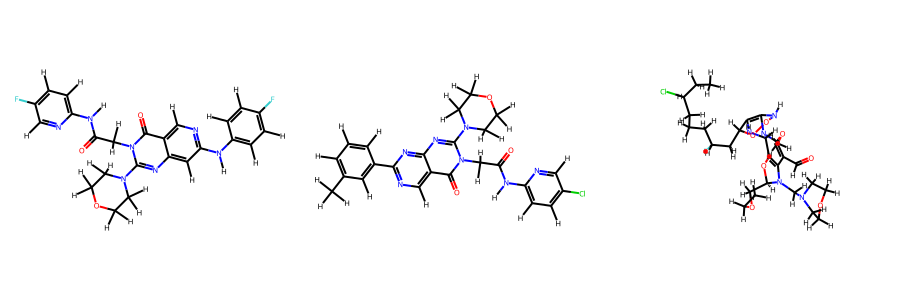

In [10]:
# Combined processing of both SMILES strings
logging.info("Combining both SMILES for joint processing.")

mol1 = Chem.AddHs(AllChem.MolFromSmiles(smiles1))
AllChem.EmbedMolecule(mol1, AllChem.ETKDG())

mol2 = Chem.AddHs(AllChem.MolFromSmiles(smiles2))
AllChem.EmbedMolecule(mol2, AllChem.ETKDG())

combined_victor = Victor(hits=[mol1, mol2], pdb_filename=protein_pdb_path)
try:
    combined_victor.combine()
except Chem.AtomValenceException:
    logging.info("Atom valence exception occurred during combined processing, trying to rectify...")
    combined_victor.rectify(collapse_rings=True, joining_cutoff=3.0)
    combined_victor.combine()

combined_molecule = combined_victor.minimized_mol
mol_2d_structures.append(combined_molecule)
combined_smiles = Chem.MolToSmiles(combined_molecule)
minimized_smiles_list.append(combined_smiles)
combined_mw = Descriptors.ExactMolWt(combined_molecule)
combined_logp = Descriptors.MolLogP(combined_molecule)
combined_hba = Descriptors.NumHAcceptors(combined_molecule)
combined_hbd = Descriptors.NumHDonors(combined_molecule)

# Visualize and save 2D structure of each resulting molecule
all_molecules = [Chem.AddHs(AllChem.MolFromSmiles(smiles1)), Chem.AddHs(AllChem.MolFromSmiles(smiles2)), combined_molecule]
display(MolsToGridImage(all_molecules, molsPerRow=3, subImgSize=(300, 300)))

# Append combined molecule data
molecule_data.append([combined_smiles, combined_mw, combined_logp, combined_hba, combined_hbd, 'combined_optimized_molecule.mol'])




In [11]:
# Process each SMILES string with the reference molecule using Victor
for i, smile in enumerate(smiles_list):
    hit_mol = Chem.AddHs(AllChem.MolFromSmiles(smile))
    AllChem.EmbedMolecule(hit_mol, AllChem.ETKDG())
    victor_with_ref = Victor(hits=[reference_mol, hit_mol], pdb_filename=protein_pdb_path)
    try:
        victor_with_ref.combine()
    except Chem.AtomValenceException:
        logging.info(f'Atom valence exception occurred for molecule {i+1} with reference, trying to rectify...')
        victor_with_ref.rectify(collapse_rings=True, joining_cutoff=3.0)
        victor_with_ref.combine()

    optimized_with_ref_molecule = victor_with_ref.minimized_mol

    # Append 2D structure to the list
    mol_2d_structures.append(optimized_with_ref_molecule)

    optimized_with_ref_smiles = Chem.MolToSmiles(optimized_with_ref_molecule)
    minimized_smiles_list.append(optimized_with_ref_smiles)

    # Calculate Lipinski's descriptors for the molecule combined with the reference
    mw_ref = Descriptors.ExactMolWt(optimized_with_ref_molecule)
    logp_ref = Descriptors.MolLogP(optimized_with_ref_molecule)
    hba_ref = Descriptors.NumHAcceptors(optimized_with_ref_molecule)
    hbd_ref = Descriptors.NumHDonors(optimized_with_ref_molecule)

    # Append data to molecule_data list
    molecule_data.append([optimized_with_ref_smiles, mw_ref, logp_ref, hba_ref, hbd_ref, f'optimized_with_ref_molecule_{i}.mol'])




Streaming output truncated to the last 5000 lines.
CRITICAL:Fragmenstein:This is impossible. [(32, 88, 87, 69), (67, 68, 69, 70, 71, 72), (86, 90, 89, 88, 87, 69, 68), (86, 90, 89, 88, 32, 69, 68)] share [69] with [] in the inside and [69] on the edge?
DEBUG:Fragmenstein:This molecule (hit0-hit1) has a fused ring
DEBUG:Fragmenstein:This molecule (hit0-hit1) has a spiro bicycle
CRITICAL:Fragmenstein:This is impossible. [(34, 25, 96, 16, 100), (91, 92, 93, 94, 95, 96), (16, 96, 25, 24, 23, 72)] share [96] with [] in the inside and [96] on the edge?
DEBUG:Fragmenstein:This molecule (hit0-hit1) has a spiro bicycle
CRITICAL:Fragmenstein:This is impossible. [(32, 88, 87, 69), (67, 68, 69, 70, 71, 72), (86, 90, 89, 88, 87, 69, 68), (86, 90, 89, 88, 32, 69, 68)] share [69] with [] in the inside and [69] on the edge?
DEBUG:Fragmenstein:This molecule (hit0-hit1) has a spiro bicycle
CRITICAL:Fragmenstein:This is impossible. [(32, 88, 87, 69), (67, 68, 69, 70, 71, 72), (86, 90, 89, 88, 87, 69, 68)

Molecule 1:
SMILES: [H]c1nc(N([H])C(=O)C([H])([H])N2C(=O)c3c([H])nc(N([H])c4c([H])c([H])c(F)c([H])c4[H])c([H])c3N=C2N2C([H])([H])C([H])([H])OC([H])([H])C2([H])[H])c([H])c([H])c1F
Lipinski's Descriptors: MW=493.16739397200007, LogP=2.9125999999999994, HBA=8, HBD=2


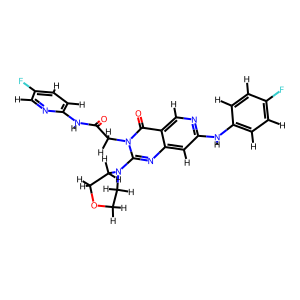


-----

Molecule 2:
SMILES: [H]c1nc(N([H])C(=O)C([H])([H])N2C(=O)c3c([H])nc(-c4c([H])c([H])c([H])c(C([H])([H])[H])c4[H])nc3N=C2N2C([H])([H])C([H])([H])OC([H])([H])C2([H])[H])c([H])c([H])c1Cl
Lipinski's Descriptors: MW=491.1472652440001, LogP=2.914620000000003, HBA=8, HBD=1


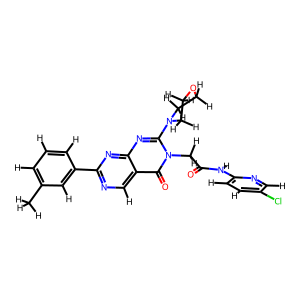


-----

Molecule 3:
SMILES: [H]C(=O)C1=C(OC([H])([H])[H])N2C3=C(N([H])C2([H])C2=C1N(C([H])([H])N1C([H])([H])C([H])([H])OC([H])([H])C1([H])[H])[C@@]([H])(C([H])([H])OC([H])([H])C([H])([H])[H])O2)C([H])(C([H])([H])C([H])(F)C([H])([H])C([H])([H])C([H])([H])C([H])(Cl)C([H])([H])C([H])([H])[H])OON3[H]
Lipinski's Descriptors: MW=601.2678545520013, LogP=2.404300000000002, HBA=12, HBD=2


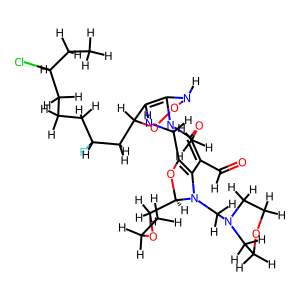


-----

Molecule 4:
SMILES: [H]O[C@]12O[C@@]([H])(ON3C([H])([H])C([H])([H])C(N([H])[H])(N([H])[H])C([H])([H])C3([H])[H])[C@]([H])(N([H])[H])[C@@]1([H])C([H])([H])[S@TB12]([H])(C([H])([H])N([H])[S@SP1]1([H])OC([H])([H])C([H])([H])C([H])([H])N([H])C([H])([H])C([H])([H])/C(C([H])([H])C([H])([H])C([H])([H])F)=C3\C4=C(C([H])([H])C([H])([H])C4([H])C([H])([H])C([H])([H])C(=C([H])[H])/C([H])=N\C([H])=C(OC([H])([H])[H])\C([H])=C([H])/N=C/1N([H])[H])C1([H])N([H])C([H])([H])C([H])([H])C([H])([H])[C@]31[H])C2([H])[H]
Lipinski's Descriptors: MW=892.519085656002, LogP=3.267100000000008, HBA=15, HBD=10


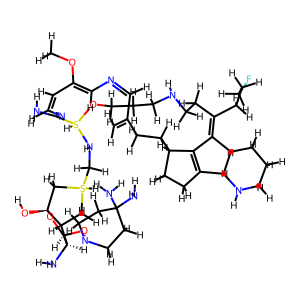


-----

Molecule 5:
SMILES: [H]N1C([H])([H])C([H])([H])C([H])([H])[S@]([H])(C2([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C2([H])[H])OC([H])([H])C1([H])C([H])([H])C([H])([H])C([H])([H])[C@]1([H])N([H])[C@@]([H])(N2C([H])([H])C([H])([H])O[C@]([H])(O[C@]([H])(N([H])[H])C([H])([H])[H])C2([H])[H])N(C([H])([H])[H])C([H])([H])C1([H])[H]
Lipinski's Descriptors: MW=501.37126149200145, LogP=2.341000000000002, HBA=8, HBD=4


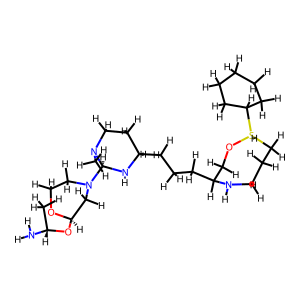


-----

Original SMILES: O=C(Cn1c(N2CCOCC2)nc2cc(Nc3ccc(F)cc3)ncc2c1=O)Nc1ccc(F)cn1


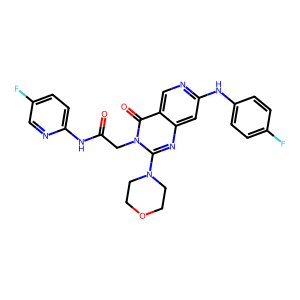

Original SMILES: Cc1cccc(-c2ncc3c(=O)n(CC(=O)Nc4ccc(Cl)cn4)c(N4CCOCC4)nc3n2)c1


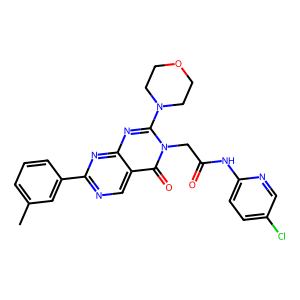

In [13]:
# Assuming each list has the same length and corresponding indices
for i in range(len(minimized_smiles_list)):
    smile = minimized_smiles_list[i]
    mol_2d = mol_2d_structures[i]
    # Correctly unpack all six items from each entry in molecule_data
    mw, logp, hba, hbd, file_name = molecule_data[i][1:]  # Skipping the first item (SMILES string)

    # Print the SMILES string and Lipinski's descriptors
    print(f"Molecule {i+1}:")
    print(f"SMILES: {smile}")
    print(f"Lipinski's Descriptors: MW={mw}, LogP={logp}, HBA={hba}, HBD={hbd}")

    # Display the 2D structure
    display(MolsToGridImage([mol_2d], molsPerRow=1, subImgSize=(300, 300)))

    print("\n-----\n")

# Print the original input SMILES and their 2D structures for comparison
original_smiles = [smiles1, smiles2]  # Replace with your original SMILES strings
for smile in original_smiles:
    mol = Chem.MolFromSmiles(smile)
    print(f"Original SMILES: {smile}")
    display(MolsToGridImage([mol], molsPerRow=1, subImgSize=(300, 300)))


In [14]:
# Output all data to a CSV file
with open('all_molecule_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['SMILES', 'Molecular Weight', 'LogP', 'HBA', 'HBD', '2D Structure File'])
    writer.writerows(molecule_data)

logging.info("All molecule data has been saved to all_molecule_data.csv")